In [1]:
#  import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# define variables
immo_vis_dir = "../../data/immo_vis/"
parquet_extension = ".parquet"
metropole_appartement_file = "ventes-metropole-appartement" + parquet_extension
metropole_maison_file = "ventes-metropole-maison" + parquet_extension

dpe_ranking     = ['0','A','B','C','D','E','F','F/G','G','NS','Unknown']
dpe_ranking_num = [10,1,2,3,4,5,6,6.5,7,9,10]

In [2]:
#  Set plot options
LargePlotActive = False
MediumPlotActive = False
SmallPlotActive = False

In [3]:
# functions 
def print_numerical_isna(df) :
    columns = df.select_dtypes(include='number').columns.tolist()
    print (df[columns].isna().sum())

def print_categorial_isna(df) :
    columns = df.select_dtypes(include='category').columns.tolist()
    print (df[columns].isna().sum())     

def load_appartement_file () :
    start_path = Path(immo_vis_dir)
    final_path = start_path / metropole_appartement_file
    final_path.as_posix
    return pd.read_parquet(final_path.as_posix())


In [4]:
# import appartement file

start_path = Path(immo_vis_dir)
final_path = start_path / metropole_appartement_file
final_path.as_posix
df = load_appartement_file()
nb_rows= df.shape[0]
nb_cols= df.shape[1]

In [5]:
#  print main infos on appartmeent file


print ( f" {metropole_appartement_file} rows {nb_rows} columns {nb_cols}")
print (df.shape)
print (df.columns)
print (df.info())
print (df.describe())



 ventes-metropole-appartement.parquet rows 2092723 columns 59
(2092723, 59)
Index(['idannonce', 'type_annonceur', 'typedebien', 'typedetransaction',
       'etage', 'surface', 'surface_terrain', 'nb_pieces', 'prix_bien',
       'prix_maison', 'prix_terrain', 'mensualiteFinance', 'balcon', 'eau',
       'bain', 'dpeL', 'dpeC', 'mapCoordonneesLatitude',
       'mapCoordonneesLongitude', 'annonce_exclusive', 'nb_etages', 'parking',
       'places_parking', 'cave', 'exposition', 'ges_class',
       'annee_construction', 'nb_toilettes', 'nb_terraces', 'videophone',
       'porte_digicode', 'surface_balcon', 'ascenseur', 'nb_logements_copro',
       'charges_copro', 'chauffage_energie', 'chauffage_systeme',
       'chauffage_mode', 'categorie_annonceur', 'logement_neuf', 'duree_int',
       'typedebien_lite', 'date', 'INSEE_COM', 'IRIS', 'CODE_IRIS',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 'DEP',
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       '

/home/cv2169/.cache/pypoetry/virtualenvs/immocv-Hc0iPIjN-py3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [6]:
#  print columns modalities
for i in df.columns:
    print(f'modalities  {i} are : ',(df[i].nunique()))

modalities  idannonce are :  2092723
modalities  type_annonceur are :  2
modalities  typedebien are :  2
modalities  typedetransaction are :  3
modalities  etage are :  121
modalities  surface are :  607
modalities  surface_terrain are :  7646
modalities  nb_pieces are :  34
modalities  prix_bien are :  57906
modalities  prix_maison are :  0
modalities  prix_terrain are :  0
modalities  mensualiteFinance are :  3862
modalities  balcon are :  42
modalities  eau are :  34
modalities  bain are :  36
modalities  dpeL are :  19
modalities  dpeC are :  7832
modalities  mapCoordonneesLatitude are :  433824
modalities  mapCoordonneesLongitude are :  569784
modalities  annonce_exclusive are :  3
modalities  nb_etages are :  104
modalities  parking are :  2
modalities  places_parking are :  205
modalities  cave are :  2
modalities  exposition are :  464
modalities  ges_class are :  19
modalities  annee_construction are :  575
modalities  nb_toilettes are :  28
modalities  nb_terraces are :  91
m

In [7]:
#  print comlmns nan values
for i in df.columns:
    print(f' {i} nan values {df[i].isna().sum()}  {(100*df[i].isna().sum()/len(df)):.2f}%')

 idannonce nan values 0  0.00%
 type_annonceur nan values 0  0.00%
 typedebien nan values 0  0.00%
 typedetransaction nan values 0  0.00%
 etage nan values 0  0.00%
 surface nan values 0  0.00%
 surface_terrain nan values 2021919  96.62%
 nb_pieces nan values 0  0.00%
 prix_bien nan values 0  0.00%
 prix_maison nan values 2092723  100.00%
 prix_terrain nan values 2092723  100.00%
 mensualiteFinance nan values 0  0.00%
 balcon nan values 0  0.00%
 eau nan values 0  0.00%
 bain nan values 0  0.00%
 dpeL nan values 0  0.00%
 dpeC nan values 686390  32.80%
 mapCoordonneesLatitude nan values 0  0.00%
 mapCoordonneesLongitude nan values 0  0.00%
 annonce_exclusive nan values 0  0.00%
 nb_etages nan values 699054  33.40%
 parking nan values 2083128  99.54%
 places_parking nan values 1248099  59.64%
 cave nan values 1165149  55.68%
 exposition nan values 0  0.00%
 ges_class nan values 484998  23.18%
 annee_construction nan values 1301804  62.21%
 nb_toilettes nan values 1044211  49.90%
 nb_ter

In [8]:
# analyze type de bien
print (df['typedebien'].value_counts()) 
print (df['logement_neuf'].value_counts()) 
# print (df['typedebien'].value_counts(normalize=True)*100)
appartement_anciens = df.loc[df["typedebien"] == "a"]
appartement_neufs = df.loc[df["typedebien"] == "an"]

logement_anciens = df.loc[df["typedebien"] == "o"]
logement_neufs = df.loc[df["typedebien"] == "n"]

print ("appartement_neufs", appartement_neufs["logement_neuf"].value_counts())
print ("appartement_anciens", appartement_anciens["logement_neuf"].value_counts())


# select apppr
print ("appartements anciens , logement ancien ", appartement_anciens[appartement_anciens["logement_neuf"]== "o"].shape[0])
print ("appartements anciens , logement neuf ", appartement_anciens[appartement_anciens["logement_neuf"]== "n"].shape[0])

print ("appartements neufs , logement neuf ", appartement_neufs[appartement_neufs["logement_neuf"]== "n"].shape[0])
print ("appartements neufs , logement ancien ", appartement_neufs[appartement_neufs["logement_neuf"]== "o"].shape[0])

print (f" prix vente m2 appartements anciens  {appartement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 appartement_neufs {appartement_neufs['prix_m2_vente'].median()}")

print (f" prix vente m2 logements anciens  {logement_anciens['prix_m2_vente'].median()}" )
print (f" prix vente m2 logements neufs {logement_neufs['prix_m2_vente'].median()}")

print (f" dpeL appartements anciens  {appartement_anciens['dpeL'].mode()[0]}" )
print (f" dpeL  appartement_neufs {appartement_neufs['dpeL'].mode()[0]}")

print ("logement_neuf is not a relaible criteria")

typedebien
a     2012384
an      80339
Name: count, dtype: int64
logement_neuf
n    1928729
o     132863
Name: count, dtype: int64
appartement_neufs logement_neuf
o    79490
n      540
Name: count, dtype: int64
appartement_anciens logement_neuf
n    1928189
o      53373
Name: count, dtype: int64
appartements anciens , logement ancien  53373
appartements anciens , logement neuf  1928189
appartements neufs , logement neuf  540
appartements neufs , logement ancien  79490
 prix vente m2 appartements anciens  4050.0
 prix vente m2 appartement_neufs 4490.2
 prix vente m2 logements anciens  nan
 prix vente m2 logements neufs nan
 dpeL appartements anciens  D
 dpeL  appartement_neufs 0
logement_neuf is not a relaible criteria


In [9]:
#  modify logement_neuf according to type de bien
mask = (df["typedebien"] == "an") & (df["logement_neuf"]== "o")
df.loc[mask,'logement_neuf'] ="n"

mask = (df["typedebien"] == "a") & (df["logement_neuf"]== "n")
df.loc[mask,'logement_neuf'] ="o"

# replace an by a
df.loc[:,'typedebien'] ="a"

# process logement neuf as integer
df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])

print (df.typedebien.value_counts())
print (df.logement_neuf.value_counts())



typedebien
a    2092723
Name: count, dtype: int64
logement_neuf
1.0    1981562
0.0      80030
Name: count, dtype: int64


/tmp/ipykernel_5670/3240239398.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['logement_neuf'] = df['logement_neuf'].replace(['o','n'],[1,0])


## Drop columns that are not relevant

In [10]:
#rendre index=idannonce pour retrouver la ligne initiale
df.set_index('idannonce',drop=True,inplace=True)

#supprimer les colonnes non pertinentes pour les maisons
df.drop(columns=['type_annonceur', 'typedebien', 'typedetransaction','typedebien_lite',
       'prix_maison', 'prix_terrain', 'mensualiteFinance',"surface_terrain",
    #    'dpeC', #pas d'information supplémentaire sur dpeC par rapport à dpeL
    #    'date','eau',
       'categorie_annonceur',  'date', 'INSEE_COM', 'IRIS', 'duree_int',
       'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG', 
       'loyer_m2_median_n6', 'nb_log_n6', 'taux_rendement_n6',
       'loyer_m2_median_n7', 'nb_log_n7', 'taux_rendement_n7'], 
       inplace=True)

## Process prix_m2_vente

In [11]:
# pre-analyse prix de vente au m2

if MediumPlotActive :
    plt.figure(figsize=(22,6))
    plt.subplot(151)
    sns.boxplot(df['prix_m2_vente'])
    plt.subplot(152)
    sns.histplot(df['prix_m2_vente'])
    plt.subplot(153)
    sns.scatterplot (df,x="surface",y="prix_m2_vente")
    plt.show()


In [12]:


# remove outliers

colonnes_num_prim = ['surface',  'prix_m2_vente']

# Création du masque en utilisant apply
mask = df[colonnes_num_prim].apply(lambda x: (x >= x.quantile(0.005)) & (x <= x.quantile(0.995))| x.isna()).all(axis=1)
#ne garder que les lignes qui sont entre q=0.005 et q=0.995
df=df[mask]
#Vérification des résultats
df[colonnes_num_prim].describe()

(df['prix_m2_vente']*df['surface']-df['prix_bien']).describe()

if MediumPlotActive :
    plt.figure(figsize=(22,6))
    plt.subplot(151)
    sns.boxplot(df['prix_m2_vente'])
    plt.subplot(152)
    sns.histplot(df['prix_m2_vente'])
    plt.subplot(153)
    sns.scatterplot (df,x="surface",y="prix_m2_vente")
    plt.show()

# 

## Traitement des colonnes  

In [13]:
# analyse NA values
import matplotlib.ticker as mtick

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
# full_columns = df.columns[ df.isna().any() == False ]
print (f" nb_rows {nb_rows} nb_cols {nb_cols}")
# print(f"columns without Nan values {full_columns.size} / {nb_cols}" )
# print (f"columns without Nans {full_columns}")
# print (missing_values)
if MediumPlotActive :
    plt.figure(figsize=(20,6))
    ax = plt.subplot(121)
    plt.plot (missing_values.index,missing_values.values)
    plt.axhline(y=int(nb_rows/2), color='r', linestyle='--', label='50%')
    plt.axhline(y=int(nb_rows*0.9), color='b', linestyle='--', label='90%')
    plt.legend()

    plt.xticks(rotation=80)
    plt.title(f"Missing values  nb-rows = {nb_rows}")
    ax2 = plt.subplot(122)
    missing_values_percent = (missing_values/nb_rows)*100.0
    plt.plot (missing_values_percent.index,missing_values_percent.values)
    plt.axhline(y=50.0, color='r', linestyle='--', label='50%')
    plt.axhline(y=90.0, color='b', linestyle='--', label='90%')
    plt.xticks(rotation=80)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(100)) 
    plt.title(f"Missing values  percentage")
    plt.legend()
    plt.show()


 nb_rows 2092723 nb_cols 59


## Process columns with too many NANs

In [14]:
# detect  columns with too many NANs (90%)
print (df.shape)
threshold = .9
nan_cols = []
for name,_ in df.items() :
    if df[name].isna().sum()/nb_rows> threshold :
        nan_cols.append(name) 
print (f"empty cols {nan_cols}")

(2055246, 34)
empty cols ['parking', 'videophone', 'surface_balcon']


In [15]:
# remove nan cols > threshold
df = df.drop(columns=nan_cols)

## Process numerical columns

In [16]:
# scatter plot of numerical variables / prix_m2_vente 

if LargePlotActive :
    columns = df.select_dtypes(include='number').columns.tolist()
    df.sort_values(by="prix_m2_vente",ascending=True)
    nrows = int(len(columns)/4) +1
    fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,nrows*4))
    index = 0
    for column in columns :
        if column not in ["idannonce","date"] :
            sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
            index = index +1


In [17]:
# remove outliers .99 % except nb_logements_copro, charges_copro

#  etage contains negative values
df.loc[:,'etage'] = df['etage'].abs() 

columns = ['bain', 'nb_toilettes', 'nb_pieces','eau','bain','nb_pieces','nb_terraces','balcon','places_parking','nb_etages','etage']
#limiter les colonnes à q=0.99 pour éliminer les outliers
threshold = 0.99
for column in columns :
    df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))


In [18]:
# display 
if LargePlotActive :
    nrows = int(len(columns)/4) +1
    fig , axes = plt.subplots(nrows = nrows, ncols = 4, figsize = (30,15*nrows))
    index = 0
    for column in columns :
        sns.scatterplot(ax=axes[int(index/4),index%4],y=df["prix_m2_vente"],x=df[column])
        index = index +1


In [19]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())


etage                            0
surface                          0
nb_pieces                        0
prix_bien                        0
balcon                           0
eau                              0
bain                             0
dpeC                        671514
mapCoordonneesLatitude           0
mapCoordonneesLongitude          0
nb_etages                   685885
places_parking             1218810
annee_construction         1274988
nb_toilettes               1022329
nb_terraces                1657536
nb_logements_copro          839625
charges_copro               843871
logement_neuf                30756
CODE_IRIS                        0
DEP                              0
prix_m2_vente                    0
dtype: int64


In [20]:
#  process  fillna values for place de parking,ombres de toilette,logement neuf, nombre de terraces
#  place de parking
df["places_parking"] = df["places_parking"].fillna(0) 
# nombres de toilettes ( can not be guessed)
df["nb_toilettes"] = df["nb_toilettes"].fillna(1).astype(int)
# logement neuf
df["logement_neuf"] = df["logement_neuf"].fillna(0)
#  nombre de terraces
df["nb_terraces"] = df["nb_terraces"].fillna(0)
df.loc[:,"nb_terraces"] = 0

print (df[columns].isna().sum())



etage                            0
surface                          0
nb_pieces                        0
prix_bien                        0
balcon                           0
eau                              0
bain                             0
dpeC                        671514
mapCoordonneesLatitude           0
mapCoordonneesLongitude          0
nb_etages                   685885
places_parking                   0
annee_construction         1274988
nb_toilettes                     0
nb_terraces                      0
nb_logements_copro          839625
charges_copro               843871
logement_neuf                    0
CODE_IRIS                        0
DEP                              0
prix_m2_vente                    0
dtype: int64


In [21]:
# nb etages
print (df.nb_etages.value_counts(dropna=False))
fig = plt.figure(figsize=(16,8))
if MediumPlotActive :
    sns.countplot(data=df,x=df.nb_etages)
df["nb_etages"]= df["nb_etages"].fillna(df["nb_etages"].median())

nb_etages
NaN     685885
4.0     290252
3.0     275214
5.0     200554
2.0     181727
6.0     131044
7.0      82759
1.0      62810
8.0      47295
9.0      26618
10.0     18192
15.0     15333
0.0      12657
11.0     10032
12.0      6901
13.0      4613
14.0      3360
Name: count, dtype: int64


<Figure size 1600x800 with 0 Axes>

In [22]:
# annee de construction
print (df.nb_logements_copro.value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df["annee_construction"])
df["annee_construction"]= df["annee_construction"].fillna(0)


nb_logements_copro
NaN        4.085277e-01
3.0        1.352101e-02
4.0        1.336239e-02
6.0        1.322032e-02
10.0       1.270456e-02
               ...     
2610.0     4.865598e-07
1530.0     4.865598e-07
3005.0     4.865598e-07
1081.0     4.865598e-07
21979.0    4.865598e-07
Name: proportion, Length: 2493, dtype: float64


In [23]:
# nb logmeent copro
threshold=0.95
column="nb_logements_copro"
print (df[column].value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



nb_logements_copro
NaN        4.085277e-01
3.0        1.352101e-02
4.0        1.336239e-02
6.0        1.322032e-02
10.0       1.270456e-02
               ...     
2610.0     4.865598e-07
1530.0     4.865598e-07
3005.0     4.865598e-07
1081.0     4.865598e-07
21979.0    4.865598e-07
Name: proportion, Length: 2493, dtype: float64
47.0


In [24]:
# charges copro
threshold=0.95
column="charges_copro"
print (df[column].value_counts(dropna=False,normalize=True))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
if MediumPlotActive :
    sns.scatterplot(y=df["prix_m2_vente"],x=df[column])
    plt.show()
print (df[column].median())
df[column]= df[column].fillna(0)



charges_copro
NaN         4.105937e-01
1200.00     1.833406e-02
0.00        1.156893e-02
600.00      9.946741e-03
1800.00     9.885435e-03
                ...     
4113.88     4.865598e-07
71826.00    4.865598e-07
570.84      4.865598e-07
1707.24     4.865598e-07
1584.16     4.865598e-07
Name: proportion, Length: 80633, dtype: float64
1300.89


In [25]:
#  remove Nan values for numerical columns
columns = df.select_dtypes(include='number').columns.tolist()
print (df[columns].isna().sum())

etage                           0
surface                         0
nb_pieces                       0
prix_bien                       0
balcon                          0
eau                             0
bain                            0
dpeC                       671514
mapCoordonneesLatitude          0
mapCoordonneesLongitude         0
nb_etages                       0
places_parking                  0
annee_construction              0
nb_toilettes                    0
nb_terraces                     0
nb_logements_copro              0
charges_copro                   0
logement_neuf                   0
CODE_IRIS                       0
DEP                             0
prix_m2_vente                   0
dtype: int64


In [26]:
column="dpeC"
threshold=.99
print (df[column].value_counts(dropna=False,normalize=True))
df.loc[:,column] = df[column].clip(upper=df[column].quantile(threshold))
fig = plt.figure(figsize=(16,8))
if MediumPlotActive :
    sns.scatterplot(y=df[column],x=df["dpeL"])
    plt.show()
result = df.groupby("dpeL")[column].mean()
print (result)
if MediumPlotActive :
    fig = plt.figure(figsize=(16,8))
    sns.scatterplot(y=result.values,x=result.index)
    plt.show()

dpeC
NaN       3.267317e-01
51.00     1.041287e-02
0.00      1.001827e-02
48.00     8.244755e-03
200.00    5.719510e-03
              ...     
349.30    4.865598e-07
106.19    4.865598e-07
624.90    4.865598e-07
385.80    4.865598e-07
155.84    4.865598e-07
Name: proportion, Length: 7731, dtype: float64
dpeL
'                             NaN
0                        4.227472
856                           NaN
A                       40.828639
A kWh/m².year                 NaN
B                       68.267941
Blank                         NaN
C                      130.961248
C kWh/m².year                 NaN
D                      199.722204
D - 231 kWh/m².year           NaN
D kWh/m².year                 NaN
D-218 kWh/m².year             NaN
E                      280.532833
E kWh/m².year          293.000000
F                      373.569255
G                      498.817944
NS                     215.514458
VI                     293.620504
Name: dpeC, dtype: float64


<Figure size 1600x800 with 0 Axes>

In [27]:
#  drop dpeC : colinearity with dpeL
column="dpeC"
df = df.drop(columns=[column])

In [28]:
#  print numercial Nan
print_numerical_isna(df)

etage                      0
surface                    0
nb_pieces                  0
prix_bien                  0
balcon                     0
eau                        0
bain                       0
mapCoordonneesLatitude     0
mapCoordonneesLongitude    0
nb_etages                  0
places_parking             0
annee_construction         0
nb_toilettes               0
nb_terraces                0
nb_logements_copro         0
charges_copro              0
logement_neuf              0
CODE_IRIS                  0
DEP                        0
prix_m2_vente              0
dtype: int64


## Process categorial columns

In [29]:
# display unique values for categorial columns for analysis

columns_categorial = df.select_dtypes(include="object").columns.tolist()
for column in columns_categorial:
    print(f"{column}: {df[column].unique()}")

dpeL: ['D' 'C' 'E' 'NS' '0' 'F' 'VI' 'B' 'G' 'A' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year' 'E kWh/m².year' 'D kWh/m².year' 'C kWh/m².year'
 'A kWh/m².year' "'" '856']
annonce_exclusive: ['Oui' 'Non' '0']
cave: [False True None]
exposition: ['0' 'Sud-Est' 'Sud' 'Est' 'SO' 'Ouest' 'E, S' 'Nord-Ouest' 'Nord-Sud'
 'traversant' 'Sud-Ouest' 'sud-ouest' 'Nord' 'Est-Ouest'
 'traversant nord-sud' 'sud-est' 'Nord-Est' 'OUEST' 'Traversant-Est-Ouest'
 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord Sud Est Ouest' 'Nord-ouest'
 'Sud-Est-Ouest' 'nord-est / sud-ouest' 'EST SUD OUEST' 'SUD EST'
 'nord-ouest / sud-est' 'Nord Sud Ouest' 'NO' 'Nord-est' 'sud est'
 'sud,ouest' 'NS' 'EST' 'Sud Ouest  Nord Ouest' 'nord,est' 'nord,ouest'
 'sud,est' 'SUD Ouest' 'NE' 'nord,sud' 'Sud et Est' 'Sud/Est' 'Sud/Ouest'
 'Nord/Ouest' 'Nord Est Ouest' 'S/E' 'est / ouest' 'N' 'ON' 'SE/SO'
 'EST / OUEST' 'Est Sud' 'Suid Ouest' 'Ouest Sud' 'OUEST / SUD'
 'sud ouest' 'OUET' 'Sud / Nord sur cour' 'EST OUEST' 'NORD SUD'
 'Ou

In [30]:
#  Process dpel
#  NS means non significative
# how to take into account dpe zero ?
print(df["dpeL"].unique())
print(df["dpeL"].isna().sum())
print(df["dpeL"].value_counts())

df["dpeL"] = df["dpeL"].fillna("Unknown")

df["dpeL"] = df["dpeL"].replace(to_replace=["D - 231 kWh/m².year","D-218 kWh/m².year","Blank",'0 kWh/m².year'],value=["D","D","Unknown","0"])
df["dpeL"] = df["dpeL"].replace(to_replace=["E kWh/m².year","D kWh/m².year","C kWh/m².year","A kWh/m².year","856","'"],value=["E","D","C","A","Unknown","Unknown"])

df["dpeL"] = df["dpeL"].replace(to_replace=["VI"],value=["F/G"])
print(df["dpeL"].value_counts())


df['dpeL_num'] = df['dpeL'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)

df['dpeL'] = pd.Categorical(df['dpeL'], dpe_ranking)
print(df["dpeL"].value_counts())

if SmallPlotActive :
    sns.histplot(df["dpeL"])
    plt.show()
    plt.figure(figsize=(10,8))
    sns.histplot(df["dpeL_num"])

['D' 'C' 'E' 'NS' '0' 'F' 'VI' 'B' 'G' 'A' 'D - 231 kWh/m².year' 'Blank'
 'D-218 kWh/m².year' 'E kWh/m².year' 'D kWh/m².year' 'C kWh/m².year'
 'A kWh/m².year' "'" '856']
0
dpeL
D                      517299
0                      313435
E                      305169
C                      299279
NS                     178234
VI                     132149
B                       97118
F                       93049
A                       73049
G                       46423
Blank                      20
D kWh/m².year               6
E kWh/m².year               6
A kWh/m².year               3
C kWh/m².year               3
D - 231 kWh/m².year         1
D-218 kWh/m².year           1
'                           1
856                         1
Name: count, dtype: int64
dpeL
D          517307
0          313435
E          305175
C          299282
NS         178234
F/G        132149
B           97118
F           93049
A           73052
G           46423
Unknown        22
Name: count, dtype: int6

/tmp/ipykernel_5670/1539892857.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dpeL_num'] = df['dpeL'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)


In [31]:
# process categorial ges_class : gaz a effet de serre : set to unknown
print(df["ges_class"].value_counts())

df["ges_class"] = df["ges_class"].fillna("Unknown")

df["ges_class"] = df["ges_class"].replace(to_replace=["D - 49 kg CO2/m².year","E-41 kg CO2/m².year","Blank","0 kg CO2/m².year"],value=["D","E","Unknown","Unknown"])
df["ges_class"] = df["ges_class"].replace(to_replace=["VI"],value=["F/G"])
df["ges_class"] = df["ges_class"].replace(to_replace=["A kg CO2/m².year","E kg CO2/m².year","B kg CO2/m².year","C kg CO2/m².year","D kg CO2/m².year","F kg CO2/m².year","NS"],value=["A","E","B","C","D","F","Unknown"])
df['ges_class'] = pd.Categorical(df['ges_class'], ['0','A','B','C','D','E','F','F/G','G','Unknown'])

df['ges_class_num'] = df['ges_class'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)

print(df["ges_class"].value_counts())

if SmallPlotActive :
    sns.histplot(df["ges_class"])
    plt.show()
    plt.figure(figsize=(10,8))
    sns.histplot(df["ges_class_num"])


ges_class
B                        339236
C                        295738
D                        247088
A                        214101
E                        182284
VI                       135777
NS                        70236
F                         64539
G                         31279
Blank                        28
B kg CO2/m².year             10
A kg CO2/m².year             10
0 kg CO2/m².year              6
F kg CO2/m².year              2
D - 49 kg CO2/m².year         1
E-41 kg CO2/m².year           1
E kg CO2/m².year              1
D kg CO2/m².year              1
C kg CO2/m².year              1
Name: count, dtype: int64
ges_class
Unknown    545177
B          339246
C          295739
D          247090
A          214111
E          182286
F/G        135777
F           64541
G           31279
0               0
Name: count, dtype: int64


/tmp/ipykernel_5670/2848423494.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ges_class_num'] = df['ges_class'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)
/tmp/ipykernel_5670/2848423494.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['ges_class_num'] = df['ges_class'].replace(to_replace=dpe_ranking,value = dpe_ranking_num)


In [32]:
# annon exclusive
print(df["annonce_exclusive"].value_counts())
df["annonce_exclusive"] = df["annonce_exclusive"].replace(to_replace=['Oui','Non','0'],value=[1,0,2]).astype(int)


annonce_exclusive
Non    969650
Oui    817726
0      267870
Name: count, dtype: int64


/tmp/ipykernel_5670/136362253.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["annonce_exclusive"] = df["annonce_exclusive"].replace(to_replace=['Oui','Non','0'],value=[1,0,2]).astype(int)


cave
True     518319
False    394592
Name: count, dtype: int64


/tmp/ipykernel_5670/2618199331.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["cave"] = df["cave"].replace(to_replace=[np.nan,False,True],value=[0,0,1])


<Axes: xlabel='cave', ylabel='Count'>

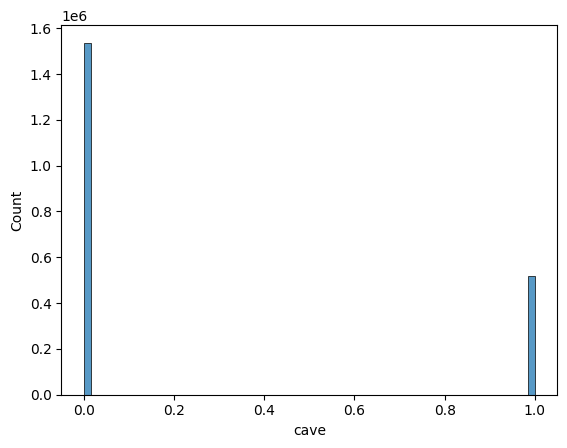

In [ ]:
print(df["cave"].value_counts())
df["cave"] = df["cave"].replace(to_replace=[np.nan,False,True],value=[0,0,1])

if SmallPlotActive :
    sns.histplot(df["cave"])


In [34]:
print(df["chauffage_energie"].value_counts())
df["chauffage_energie"] = df["chauffage_energie"].fillna("unknown")


df['chauffage_energie'] = df['chauffage_energie'].str.lower()
df['chauffage_energie'] = df['chauffage_energie'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)
df["chauffage_energie"] = df["chauffage_energie"].replace(to_replace=["électrique"],value=["elec"],regex=True)
print(df["chauffage_energie"].unique())

#  create sub-categories
energies = ["gaz","elec","bois","fioul"]
for energy in energies :
    target = "chauf-" + energy
    print(target)
    df[target] = df["chauffage_energie"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())

for energy in energies :
#  simplify chauffage-energie to first value
    df["chauffage_energie"] = df["chauffage_energie"].apply(lambda x : energy if x.startswith(energy) else x)

# df['chauffage_energie'] = pd.Categorical(df['chauffage_energie'], energies)

if MediumPlotActive :
    plt.figure(figsize=(14,8))
    sns.histplot(df["chauffage_energie"])

if SmallPlotActive :
    plt.figure(figsize=(14,6))
    plt.subplot(141)
    sns.histplot(df["chauf-fioul"],discrete=True)
    plt.subplot(142)
    sns.histplot(df["chauf-bois"],discrete=True)
    plt.subplot(143)
    sns.histplot(df["chauf-gaz"],discrete=True)
    plt.subplot(144)
    sns.histplot(df["chauf-elec"],discrete=True)
    plt.show()


chauffage_energie
Électrique                 520296
Gaz                        513654
Fioul                       22582
Bois                         1338
Gaz, Électrique               910
Électrique, Bois              646
Gaz, Bois                     222
Fioul, Électrique              57
Gaz, Fioul                     31
Fioul, Bois                    28
Bois, Électrique               19
Électrique, Fioul              13
Bois, Fioul                    12
Gaz, Électrique, Bois           5
Bois, Fioul, Électrique         2
Électrique, Fioul, Bois         1
Électrique, Bois, Fioul         1
Name: count, dtype: int64
['fioul' 'gaz' 'elec' 'unknown' 'elec,bois' 'gaz,bois' 'bois' 'gaz,elec'
 'bois,elec' 'fioul,bois' 'fioul,elec' 'gaz,fioul' 'bois,fioul'
 'gaz,elec,bois' 'elec,fioul' 'elec,fioul,bois' 'elec,bois,fioul'
 'bois,fioul,elec']
chauf-gaz
chauf-gaz
0    1540424
1     514822
Name: count, dtype: int64
chauf-elec
chauf-elec
0    1533296
1     521950
Name: count, dtype: int64
chauf-boi

In [35]:
#  chauffage system
print(df["chauffage_systeme"].value_counts())

df["chauffage_systeme"] = df["chauffage_systeme"].fillna("unknown")

df['chauffage_systeme'] = df['chauffage_systeme'].str.lower()
df['chauffage_systeme'] = df['chauffage_systeme'].replace(to_replace=[", "," ,",","],value=[",",",",","],regex=True)

changes = {"fluide caloporteur" :"pompe à chaleur","panneau rayonnant" : "convecteur" }
for  old_name, new_name in changes.items() :
    df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : new_name if old_name in x else x)

#  create sub-categories
energies = ["climatisation","pompe à chaleur","convecteur","radiateur","chaudière","sol","poêle-bois"]
outers = ["climatisation","pompe-chaleur","convecteur","radiateur","chaudiere","sol","poele-bois"]

for energy,outer in zip(energies,outers) :
    target = "chauf_sys_" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : 1 if energy in x else 0)
    print (df[target].value_counts())
# sort by decreasing importance


# df['chauffage_systeme'] = pd.Categorical(df['chauffage_systeme'], energies)
if MediumPlotActive :
    energies = ["climatisation révérsible","pompe à chaleur","sol","convecteur","radiateur","chaudière","poêle à bois"]
    for name in energies : 
        df["chauffage_systeme"] = df["chauffage_systeme"].apply(lambda x : name if name in x else x)
    plt.figure(figsize=(8,6))
    sns.histplot(df["chauffage_systeme"])
    plt.xticks(rotation=70)
    plt.show()

if SmallPlotActive :

    plt.figure(figsize=(20,6))

    plt.subplot(171)
    sns.histplot(df["chauf_sys_climatisation"],discrete=True)

    plt.subplot(172)
    sns.histplot(df["chauf_sys_pompe-chaleur"],discrete=True)

    plt.subplot(173)
    sns.histplot(df["chauf_sys_convecteur"],discrete=True)

    plt.subplot(174)
    sns.histplot(df["chauf_sys_radiateur"],discrete=True)

    plt.subplot(175)
    sns.histplot(df["chauf_sys_chaudiere"],discrete=True)
    plt.subplot(176)
    sns.histplot(df["chauf_sys_sol"],discrete=True)
    plt.subplot(177)
    sns.histplot(df["chauf_sys_poele-bois"],discrete=True)

chauffage_systeme
Radiateur                                          537680
Convecteur                                          30384
Sol                                                 24739
Climatisation révérsible                            22821
Pompe à chaleur                                     13007
Chaudière                                            3096
Pompe à chaleur, Climatisation révérsible            1258
Poêle à Bois                                          718
Pompe à chaleur, Radiateur                            478
Pompe à chaleur, Sol                                  436
Cheminée                                              358
Radiateur, Chaudière                                  311
Radiateur, Climatisation révérsible                   153
Sol, Radiateur                                        142
Pompe à chaleur, Convecteur                            83
Sol, Convecteur                                        75
Convecteur, Climatisation révérsible                  

In [36]:
#porcess categorial  chauffage mode, 50% isna
print(df["chauffage_mode"].value_counts())
print(df["chauffage_mode"].isna().sum())
df["chauffage_mode"] = df["chauffage_mode"].fillna("unknown")
df["chauffage_mode"] = df["chauffage_mode"].str.lower()

print(df["chauffage_mode"].value_counts())

outers = ["individuel","collectif","central"]
for energy,outer in zip(energies,outers) :
    target = "chauffage_mode_" + outer
    print(target)
    df[target] = df["chauffage_systeme"].apply(lambda x : int(1) if energy in x else int(0))
    print (df[target].value_counts())


# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Individuel"  if "Individuel" in x else x)
# df["chauffage_mode"] = df["chauffage_mode"].apply(lambda x : "Collectif"  if "Central" in x else x)
print(df["chauffage_mode"].value_counts())

if MediumPlotActive :
    plt.figure(figsize=(8,6))
    sns.histplot(df["chauffage_mode"])
    plt.xticks(rotation=70)
    plt.show()

if SmallPlotActive :
    
    plt.figure(figsize=(20,6))
    plt.subplot(131)
    sns.histplot(df["chauffage_mode_individuel"],discrete=True)
    plt.subplot(132)
    sns.histplot(df["chauffage_mode_collectif"],discrete=True)
    plt.subplot(133)
    sns.histplot(df["chauffage_mode_central"],discrete=True)



chauffage_mode
Individuel                        808214
Collectif                         356593
Collectif, Central                 13112
Central                             5091
Collectif, Individuel               4834
Individuel, Central                 2614
Collectif, Individuel, Central         4
Name: count, dtype: int64
864784
chauffage_mode
unknown                           864784
individuel                        808214
collectif                         356593
collectif, central                 13112
central                             5091
collectif, individuel               4834
individuel, central                 2614
collectif, individuel, central         4
Name: count, dtype: int64
chauffage_mode_individuel
chauffage_mode_individuel
0    2030897
1      24349
Name: count, dtype: int64
chauffage_mode_collectif
chauffage_mode_collectif
0    2039904
1      15342
Name: count, dtype: int64
chauffage_mode_central
chauffage_mode_central
0    2024582
1      30664
Name: count, dtype

In [37]:
# print (df.exposition.unique())
import re

def encode_exposition_advanced(df):
    """
    Encodage avancé de la colonne exposition pour modèles ML
    """
    # Nettoyage initial 
    df['exposition_clean'] = df['exposition'].astype(str).str.lower()
    df['exposition_clean'] = df['exposition_clean'].str.replace(r'[^\w\s/-]', '', regex=True)
    
    # 1. Variables binaires par direction (ordre important pour éviter les conflits)
    def detect_directions(expo_text):
        """Détection intelligente des directions avec gestion des conflits"""
        if pd.isna(expo_text) or expo_text == 'nan':
            return {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}
        
        text = str(expo_text).lower()
        directions = {'nord': 0, 'sud': 0, 'est': 0, 'ouest': 0}

       #Traitement des expositions en mélangeant Nord-Est avec les deux directions nord ET est 
        if re.search(r'\bnord\b', text) :
            directions['nord'] = 1
        if re.search(r'\bsud\b', text) :
            directions['sud'] = 1
        if re.search(r'\best\b', text) :
            directions['est'] = 1
        if re.search(r'\bouest\b', text) :
            directions['ouest'] = 1

        # Gestion des abréviations isolées (plus prudente)
        words = re.sub(r'[-+/]', ' ', text).split()
        for word in words:
            if word == 'n' :
                directions['nord'] = 1
            elif word == 's' :
                directions['sud'] = 1
            elif word == 'e' :
                directions['est'] = 1
            elif word == 'o' :
                directions['ouest'] = 1
        
        return directions
    
    # Application de la détection
    direction_results = df['exposition_clean'].apply(detect_directions)
    for direction in ['nord', 'sud', 'est', 'ouest']:
        df[f'expo_has_{direction}'] = [result[direction] for result in direction_results]

    return 

encode_exposition_advanced(df)

if SmallPlotActive :
    plt.figure(figsize=(20,6))
    plt.subplot(141)
    sns.histplot(df["expo_has_nord"],discrete=True)
    plt.subplot(142)
    sns.histplot(df["expo_has_est"],discrete=True)
    plt.subplot(143)
    sns.histplot(df["expo_has_ouest"],discrete=True)
    plt.subplot(144)
    sns.histplot(df["expo_has_sud"],discrete=True)


print(f" after processing {df['exposition'].unique()}")


 after processing ['0' 'Sud-Est' 'Sud' 'Est' 'SO' 'Ouest' 'E, S' 'Nord-Ouest' 'Nord-Sud'
 'traversant' 'Sud-Ouest' 'sud-ouest' 'Nord' 'Est-Ouest'
 'traversant nord-sud' 'sud-est' 'Nord-Est' 'OUEST' 'Traversant-Est-Ouest'
 'Nord Sud Est' 'SUD' 'SUD OUEST' 'Nord Sud Est Ouest' 'Nord-ouest'
 'Sud-Est-Ouest' 'nord-est / sud-ouest' 'EST SUD OUEST' 'SUD EST'
 'nord-ouest / sud-est' 'Nord Sud Ouest' 'NO' 'Nord-est' 'sud est'
 'sud,ouest' 'NS' 'EST' 'Sud Ouest  Nord Ouest' 'nord,est' 'nord,ouest'
 'sud,est' 'SUD Ouest' 'NE' 'nord,sud' 'Sud et Est' 'Sud/Est' 'Sud/Ouest'
 'Nord/Ouest' 'Nord Est Ouest' 'S/E' 'est / ouest' 'N' 'ON' 'SE/SO'
 'EST / OUEST' 'Est Sud' 'Suid Ouest' 'Ouest Sud' 'OUEST / SUD'
 'sud ouest' 'OUET' 'Sud / Nord sur cour' 'EST OUEST' 'NORD SUD'
 'Ouest - Sud - Est' 'Nord, Ouest' 'Sud et Ouest' 'NORD OUEST'
 'Sud Ouest Nord' 'SUD NORD' 'EST/SUD/OUEST' 'Est, Ouest' 'EST - OUEST'
 'Sud-Ouest / Nord-Est' 'TRIPLE' 'Est et Ouest' 'Nord-Ouest et Sud-Est'
 'Ouest et Est' 'SUD OUEST &

In [34]:
#  drop categorial columns thzt are no more relevant
columns = ["exposition","chauffage_mode","chauffage_systeme","chauffage_energie","dpeL","ges_class"]
df.drop(columns=columns,inplace=True)

In [35]:
print_categorial_isna(df)
print_numerical_isna(df)

ges_class_num    0
dtype: int64


: 